In [21]:
import osmnx as ox
import matplotlib.pyplot as plt

In [22]:
place = 'Kumasi Metropolitan District'

In [23]:
graph = ox.graph_from_place(place)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


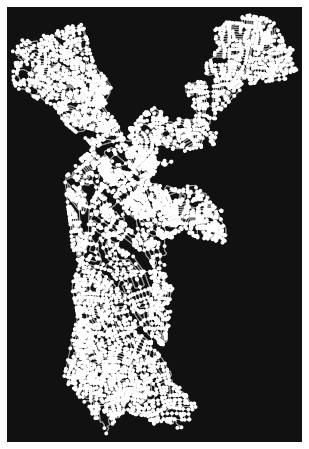

In [24]:
fig, ax = ox.plot_graph(graph)

In [25]:
nodes, edges = ox.graph_to_gdfs(graph)

In [26]:
print(f'nodes crs: {nodes.crs}\negdges crs: {edges.crs}')

nodes crs: epsg:4326
egdges crs: epsg:4326


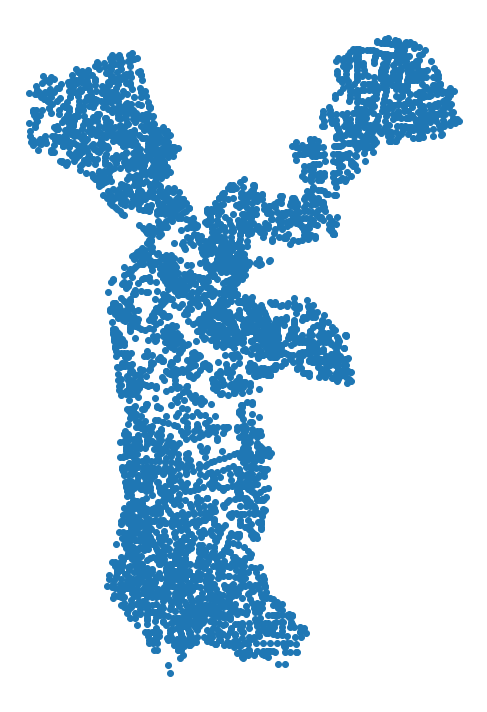

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax)
ax.axis('off')
plt.tight_layout()

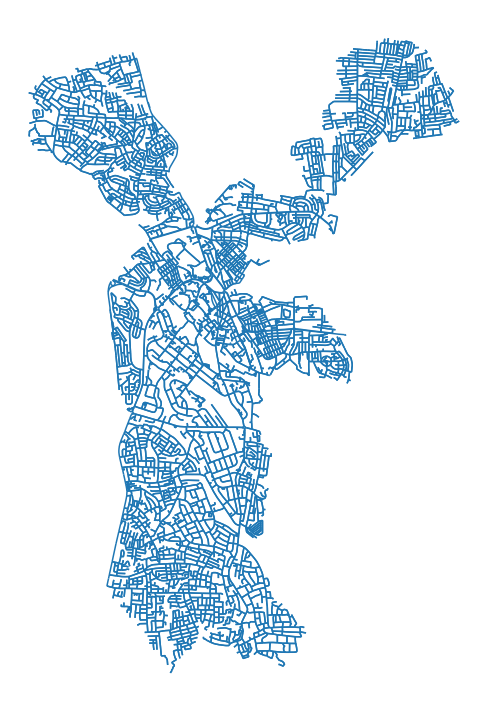

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax)
ax.axis('off')
plt.tight_layout()

In [29]:
edges.head()

osmid                name      highway  oneway  \
u         v          key                                                       
330232633 7661148790 0    170804906     Edwabrem Avenue     tertiary   False   
          2171161102 0    170807463          Zongo Road     tertiary   False   
          5106735831 0    661050099  Adonten S. E. Road     tertiary   False   
330232637 2171161076 0    207000170                 NaN  residential   False   
          7661198291 0    304715583                 NaN  residential   False   

                           length  \
u         v          key            
330232633 7661148790 0     41.700   
          2171161102 0     71.492   
          5106735831 0     29.376   
330232637 2171161076 0    152.582   
          7661198291 0    128.928   

                                                                   geometry  \
u         v          key                                                      
330232633 7661148790 0      LINESTRING (-1.61632 6.69591, -1.61615 6.69558)   
          2171161102 0    LINESTRING (-1.61632 6.69591, -1.61617 6.69602...   
          5106735831 0    LINESTRING (-1.61632 6.69591, -1.61646 6.69583...   
330232637 2171161076 0      LINESTRING (-1.61465 6.69268, -1.61338 6.69322)   
          7661198291 0      LINESTRING (-1.61465 6.69268, -1.61573 6.69222)   

                         lanes bridge junction  ref width tunnel maxspeed  \
u         v          key                                                    
330232633 7661148790 0     NaN    NaN      NaN  NaN   NaN    NaN      NaN   
          2171161102 0     NaN    NaN      NaN  NaN   NaN    NaN      NaN   
          5106735831 0     NaN    NaN      NaN  NaN   NaN    NaN      NaN   
330232637 2171161076 0     NaN    NaN      NaN  NaN   NaN    NaN      NaN   
          7661198291 0     NaN    NaN      NaN  NaN   NaN    NaN      NaN   

                         service  
u         v          key          
330232633 7661148790 0       NaN  
          2171161102 0       NaN  
          5106735831 0       NaN  
330232637 2171161076 0       NaN  
          7661198291 0       NaN

In [30]:
kma_roads = edges[['highway', 'length', 'geometry', 'name']]

In [31]:
kma_roads.head()

highway   length  \
u         v          key                         
330232633 7661148790 0       tertiary   41.700   
          2171161102 0       tertiary   71.492   
          5106735831 0       tertiary   29.376   
330232637 2171161076 0    residential  152.582   
          7661198291 0    residential  128.928   

                                                                   geometry  \
u         v          key                                                      
330232633 7661148790 0      LINESTRING (-1.61632 6.69591, -1.61615 6.69558)   
          2171161102 0    LINESTRING (-1.61632 6.69591, -1.61617 6.69602...   
          5106735831 0    LINESTRING (-1.61632 6.69591, -1.61646 6.69583...   
330232637 2171161076 0      LINESTRING (-1.61465 6.69268, -1.61338 6.69322)   
          7661198291 0      LINESTRING (-1.61465 6.69268, -1.61573 6.69222)   

                                        name  
u         v          key                      
330232633 7661148790 0       Edwabrem Avenue  
          2171161102 0            Zongo Road  
          5106735831 0    Adonten S. E. Road  
330232637 2171161076 0                   NaN  
          7661198291 0                   NaN

In [32]:
road_groups = kma_roads.groupby(lambda x: str(['highway']))

In [33]:
road_groups.head()

highway   length  \
u         v          key                         
330232633 7661148790 0       tertiary   41.700   
          2171161102 0       tertiary   71.492   
          5106735831 0       tertiary   29.376   
330232637 2171161076 0    residential  152.582   
          7661198291 0    residential  128.928   

                                                                   geometry  \
u         v          key                                                      
330232633 7661148790 0      LINESTRING (-1.61632 6.69591, -1.61615 6.69558)   
          2171161102 0    LINESTRING (-1.61632 6.69591, -1.61617 6.69602...   
          5106735831 0    LINESTRING (-1.61632 6.69591, -1.61646 6.69583...   
330232637 2171161076 0      LINESTRING (-1.61465 6.69268, -1.61338 6.69322)   
          7661198291 0      LINESTRING (-1.61465 6.69268, -1.61573 6.69222)   

                                        name  
u         v          key                      
330232633 7661148790 0       Edwabrem Avenue  
          2171161102 0            Zongo Road  
          5106735831 0    Adonten S. E. Road  
330232637 2171161076 0                   NaN  
          7661198291 0                   NaN

In [34]:
kma_roads.tail()

highway   length  \
u          v          key                         
9487369755 6436547659 0    residential  114.150   
9525509886 9525509889 0        service   90.550   
9525509889 4455097305 0        service  102.037   
           3724904167 0        service   21.108   
           9525509886 0        service   90.550   

                                                                    geometry  \
u          v          key                                                      
9487369755 6436547659 0      LINESTRING (-1.63267 6.68731, -1.63188 6.68665)   
9525509886 9525509889 0    LINESTRING (-1.61428 6.70335, -1.61430 6.70327...   
9525509889 4455097305 0      LINESTRING (-1.61491 6.70351, -1.61443 6.70430)   
           3724904167 0      LINESTRING (-1.61491 6.70351, -1.61500 6.70335)   
           9525509886 0    LINESTRING (-1.61491 6.70351, -1.61441 6.70318...   

                          name  
u          v          key       
9487369755 6436547659 0    NaN  
9525509886 9525509889 0    NaN  
9525509889 4455097305 0    NaN  
           3724904167 0    NaN  
           9525509886 0    NaN

In [35]:
kma_roads = kma_roads.reset_index(drop=True)

In [36]:
kma_roads.head()

,highway,length,geometry,name
0,tertiary,41.700,"LINESTRING (-1.61632 6.69591, -1.61615 6.69558)",Edwabrem Avenue
1,tertiary,71.492,"LINESTRING (-1.61632 6.69591, -1.61617 6.69602...",Zongo Road
2,tertiary,29.376,"LINESTRING (-1.61632 6.69591, -1.61646 6.69583...",Adonten S. E. Road
3,residential,152.582,"LINESTRING (-1.61465 6.69268, -1.61338 6.69322)",NaN
4,residential,128.928,"LINESTRING (-1.61465 6.69268, -1.61573 6.69222)",NaN


In [37]:
kma_roads['highway'] = kma_roads['highway'].astype('str')

In [38]:
kma_roads['highway'].dtype

dtype('O')

In [39]:
road_classes = kma_roads.dissolve(by='highway')

In [40]:
road_classes

,geometry,length,name
highway,,,
"['footway', 'residential']","MULTILINESTRING ((-1.63432 6.71716, -1.63433 6...",162.446,None
"['footway', 'service']","MULTILINESTRING ((-1.62775 6.69560, -1.62756 6...",129.200,None
"['residential', 'path']","MULTILINESTRING ((-1.63454 6.70049, -1.63476 6...",376.483,None
footway,"MULTILINESTRING ((-1.62109 6.70576, -1.62141 6...",52.336,None
living_street,"MULTILINESTRING ((-1.57447 6.73828, -1.57454 6...",117.081,None
path,"MULTILINESTRING ((-1.61987 6.68898, -1.61945 6...",50.177,Wawase Walk
primary,"MULTILINESTRING ((-1.64305 6.69902, -1.64198 6...",319.862,Pine Avenue
residential,"MULTILINESTRING ((-1.61465 6.69268, -1.61338 6...",152.582,Dr. Donkor Fordjour Avenue
secondary,"MULTILINESTRING ((-1.62345 6.68699, -1.62348 6...",20.798,Harper Road


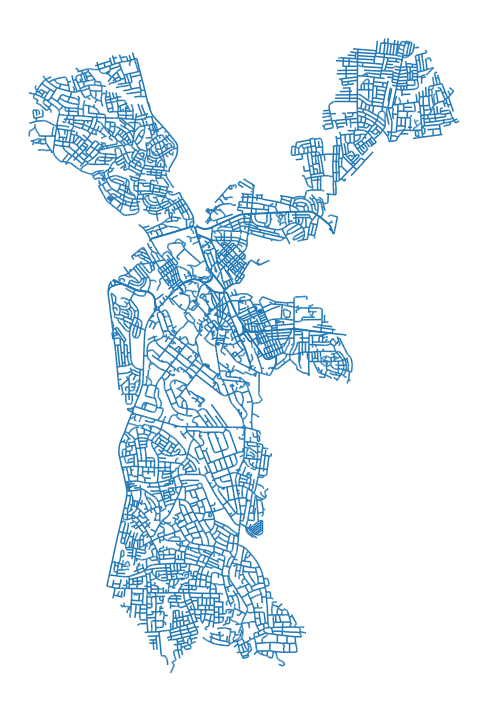

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
road_classes.plot(ax=ax,)
ax.axis('off')
plt.tight_layout()

In [42]:
highway_values = kma_roads['highway'].unique()

In [43]:
list(highway_values)

['tertiary',
 'residential',
 'secondary',
 'trunk',
 'secondary_link',
 'unclassified',
 'service',
 'footway',
 'trunk_link',
 'primary',
 'path',
 "['residential', 'path']",
 "['footway', 'residential']",
 'tertiary_link',
 "['footway', 'service']",
 'living_street',
 'track']

In [44]:
# unclassified => local roads
# tertiary => footpaths, cycle ways, heavy residential
# secondary => service streets, public transport, industrial
# primary => high_streets, public transports, arterials
# trunk => links different regions
def rename_highway_type(name):
    if any(True if val in name else False for val in ('tertiary', 'path', 'footway', 'residential')):
        return 'Residential Access'
    if 'trunk' in name:
        return 'Inter-Regional Access'
    if any(True if val in name else False for val in ('secondary', 'service')):
        return 'District Distributor'
    if any(True if val in name else False for val in ('class', 'street', 'track')):
        return 'Local Distributor'
    if any(True if val in name else False for val in ('primary')):
        return 'Primary Distributor'
    
    return None
        
        

kma_roads['class'] = kma_roads['highway'].apply(rename_highway_type)

In [45]:
kma_roads.head(10)

,highway,length,geometry,name,class
0,tertiary,41.700,"LINESTRING (-1.61632 6.69591, -1.61615 6.69558)",Edwabrem Avenue,Residential Access
1,tertiary,71.492,"LINESTRING (-1.61632 6.69591, -1.61617 6.69602...",Zongo Road,Residential Access
2,tertiary,29.376,"LINESTRING (-1.61632 6.69591, -1.61646 6.69583...",Adonten S. E. Road,Residential Access
3,residential,152.582,"LINESTRING (-1.61465 6.69268, -1.61338 6.69322)",NaN,Residential Access
4,residential,128.928,"LINESTRING (-1.61465 6.69268, -1.61573 6.69222)",NaN,Residential Access
5,tertiary,56.651,"LINESTRING (-1.61465 6.69268, -1.61444 6.69222)",Maxwell Road,Residential Access
6,tertiary,55.723,"LINESTRING (-1.61465 6.69268, -1.61472 6.69284...",Edwabrem Avenue,Residential Access
7,tertiary,21.351,"LINESTRING (-1.61599 6.68142, -1.61605 6.68160)",Osei Tutu I Avenue,Residential Access
8,tertiary,52.072,"LINESTRING (-1.61599 6.68142, -1.61567 6.68124...",Osei Tutu I Avenue,Residential Access
9,secondary,20.798,"LINESTRING (-1.62345 6.68699, -1.62348 6.68681)",Harper Road,District Distributor


In [68]:
colors = {
    'Residential Access': '#C0C0C0',
    'Inter-Regional Access': '#708090',
    'District Distributor': '#696969',
    'Local Distributor': '#2F4F4F',
    'Primary Distributor': '#DCDCDC',
}

linewidtth = {
    'Residential Access': 0.9,
    'Inter-Regional Access': 2.0,
    'District Distributor': 1.7,
    'Local Distributor': 1.1,
    'Primary Distributor': 1.4,
}

### get kma bouding box

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


<AxesSubplot:>

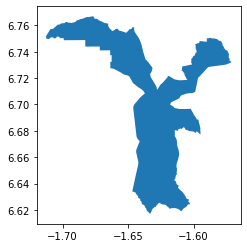

In [47]:
area = ox.geocode_to_gdf(place)
area.plot()

In [51]:
import contextily as ctx

In [69]:
import matplotlib.patches as mpatches

def plot_and_save(legend_title, legend_bbox, path, dpi=300):
    f, ax = plt.subplots(figsize=(15, 15))
    
    # plot background polygon
    # area.plot(ax=ax, facecolor='black')
    
    # plot the road data
    kma_roads.plot(ax=ax,
                  color=[colors[val] for val in kma_roads['class']],
                  linewidth=[linewidtth[val] for val in kma_roads['class']],
                  alpha=[0.7] * len(kma_roads['class']))
    
    # plot legend
    plt.legend(handles=[mpatches.Patch(color=colors[val], label=val) for val in colors],
              loc='center right',
              fontsize='large',
              title=legend_title,
              bbox_to_anchor=legend_bbox)
    
    # Add basemap
    ctx.add_basemap(ax, crs=kma_roads.crs, source=ctx.providers.CartoDB.Positron)
    
    plt.axis('off')
    plt.tight_layout()
    
    # save figure
    plt.savefig(path, bbox_inches='tight', dpi=dpi)
    plt.show()

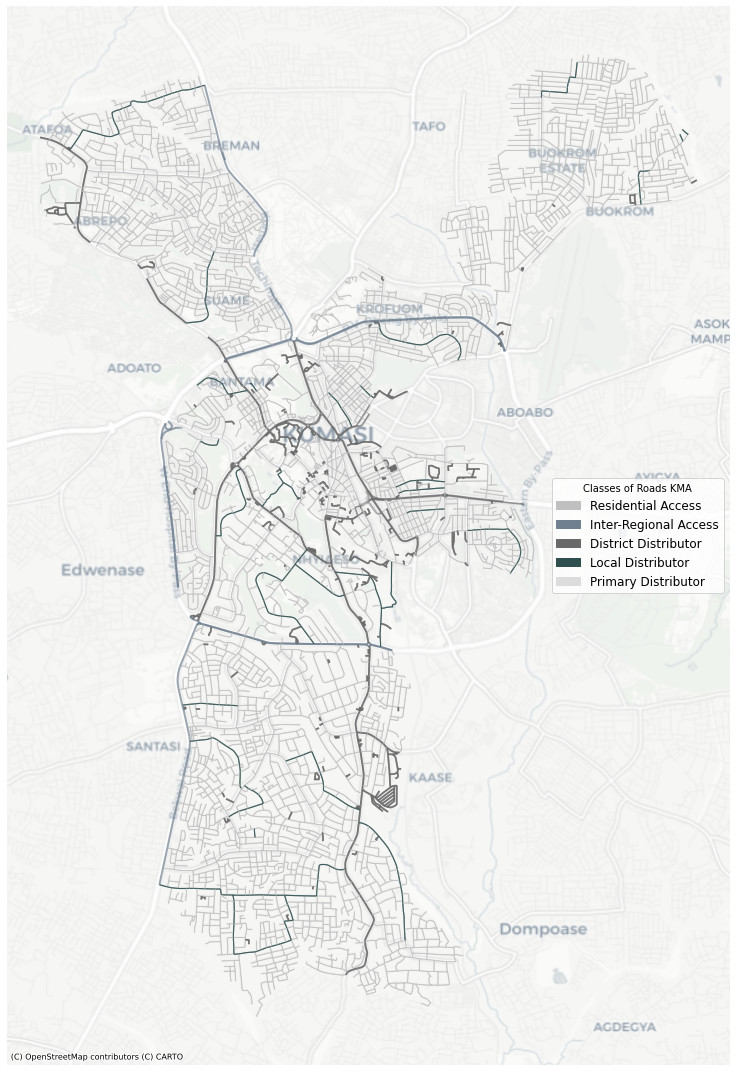

In [70]:
plot_and_save('Classes of Roads KMA', (1, 0.5), 'kma_roads_classes_with_basemap.png')